# Project Proposal: Acidity in Wine

## Introduction

### Background Information and Question

All wines are acidic, with pH between 3 and 4. However, white wines are usually more acidic than red wines. White wines' pH generally falls between 3 and 4 while for red wines between 3.3 and 3.6.

The acidic level has significant impact on the fermentation process of a wine and additives, such as sulfur dioxide. Consequently, acidity can significantly influence the taste, colour, and smell of a wine.

In this project, we are asking the following question: Does the white variant of the Portuguese “Vinho Verde” wine has the same mean pH level as the red variant?

Our population of interest is the Portuguese “Vinho Verde” wine and the data used in this project is collected from samples of red and white variants of the "Vinho Verde" wine.

Our point estimates are the mean and standard deviation difference between the pH level of red and white “Vinho Verde” wines. The standard deviation will be helpful in constructing confidence intervals and conducting our hypothesis test. Let $m_{1}$ be the mean pH level of the red variant and $m_{2}$ the mean pH level of the white variant. Then our null hypothesis is that $m_{1} = m_{2}$ and the alternative hypothesis is that $m_{1} \neq m_{2}$.

### Dataset Used

The dataset that will be used is the Wine Quality dataset, which can be found [here](https://archive.ics.uci.edu/dataset/186/wine+quality). This dataset consists of two smaller datasets one related to the red variant of the “Vinho Verde” wine and the other related to the white variant.

The dataset was created using red and white wine samples of the “Vinho Verde” wine and each row includes objective tests, such as density, pH level, and alcohol for a sample.

## Preliminary Results

In [12]:
library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)

In [13]:
# Demonstrate that the dataset can be read from the web into R

url_1 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine <- read.csv(url_1, sep=';') |>
    mutate(type = "Red")

white_wine <- read.csv(url_2, sep=';') |>
    mutate(type = "White")

In [14]:
# Combining the red wine and white wine data

wine_data <- rbind(red_wine, white_wine) |>
    select(type, pH)

head(wine_data)

,type,pH
,<chr>,<dbl>
1,Red,3.51
2,Red,3.20
3,Red,3.26
4,Red,3.16
5,Red,3.51
6,Red,3.51


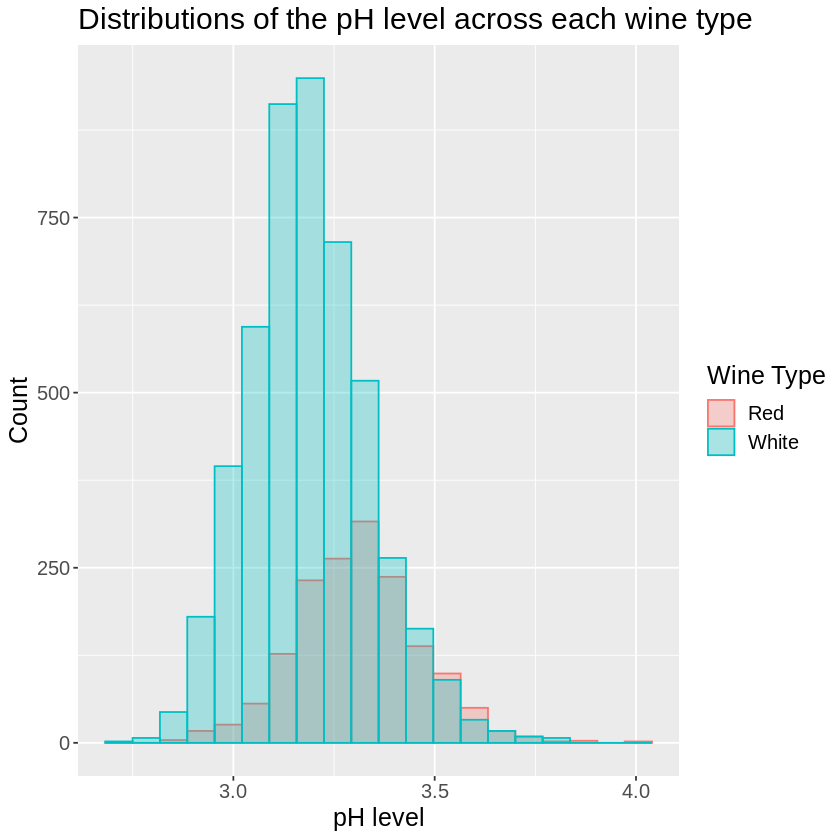

In [15]:
# Distribution of the pH level of each type from the raw dataset 

ph_dis <- wine_data |>
    ggplot() +
    aes(x = pH, fill = type, colour = type) +
    geom_histogram(alpha = 0.3, position = 'identity', bins = 20) +
    labs(x = "pH level",
         y = "Count",
         fill = "Wine Type",
         colour = "Wine Type",
         title = "Distributions of the pH level across each wine type") +
    theme(text = element_text(size = 15),
          plot.title = element_text(size = 18))
          
ph_dis

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


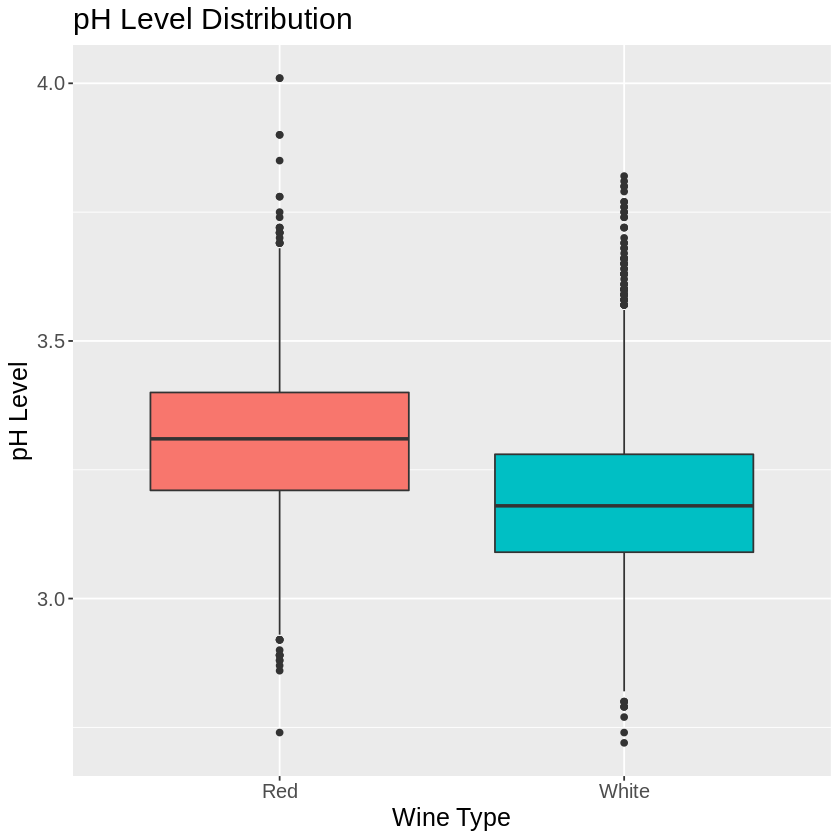

In [16]:
# Boxplot of the pH level of both wine types

ph_level_boxplots <-
    wine_data %>% 
    ggplot() +
    geom_boxplot(aes(x = type, y = pH, fill = type)) +
    theme(text = element_text(size = 15)) +
    ggtitle('pH Level Distribution') + 
    xlab('Wine Type') + 
    ylab('pH Level') + 
    guides(fill = FALSE)

ph_level_boxplots

In [19]:
# The mean and sd of each type of wine

wine_data_summary <- wine_data |>
    filter(!is.na(pH)) |>
    group_by(type) |>
    summarize(sample_mean = mean(pH),
              sample_sd = sd(pH),
              n = n())

wine_data_summary

type,sample_mean,sample_sd,n
<chr>,<dbl>,<dbl>,<int>
Red,3.311113,0.1543865,1599
White,3.188267,0.1510006,4898


In [20]:
# The difference in mean and sd

diff_mean_sd <- tibble(
    diff_mean = wine_data_summary$sample_mean[1] - wine_data_summary$sample_mean[2],
    diff_sd = wine_data_summary$sample_sd[1] - wine_data_summary$sample_sd[2]
)

diff_mean_sd

diff_mean,diff_sd
<dbl>,<dbl>
0.1228466,0.003385865


## Methods: Plan

As we can see from the plots above and the data summary, the mean pH level of the red variant is greater than the mean pH level of the white variant. Also, the distribution of the pH level for both types of wine are symmetrical, unimodal, and similar to a Normal distribution.

Although this difference is expected based on existing literature, a robust statistical inference analysis should be conducted to establish statistical significance of this result. We plan to do this by conducting a hypothesis test with 10% significance level with the null and alternative hypothesis stated in the Introduction section of this proposal and a 90% confidence interval for our point estimates. Furthermore, we plan to compare the results of the bootstrap and asymptotics methods.

### What do you expect to find?
Based on the plots above and the data summary, we expect to see that the mean pH level of the red variant of the “Vinho Verde” wine is greater than the one for the white variant.

### What impact could such findings have?
These findings could serve as a reference to wine producers to better understand what acidity level the environment in which each type of wine is fermented should have in order to produce a high-quality wine.

### What future questions could this lead to?
- Could the pH level be a useful feature in wine classification tasks?
- How the pH of other types of wine relate to red and white wines?

## References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., &amp; Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016

O’Donnell, D. (2022, May 13). Improving the taste and color of wine with PH control: Sensorex. Sensorex Liquid Analysis Technology. https://sensorex.com/ph-improve-taste-color-wine/?v=3e8d115eb4b3

Tanthanuch, S., Kukiattrakoon, B., Peerasukprasert, T., Chanmanee, N., Chaisomboonphun, P., &amp; Rodklai, A. (2016). The effect of red and white wine on color changes of nanofilled and nanohybrid resin composites. Restorative Dentistry &amp;amp; Endodontics, 41(2), 130. https://doi.org/10.5395/rde.2016.41.2.130

Darias-Martı́n, J., Socas-Hernández, A., Dı́az-Romero, C., &amp; Dı́az-Dı́az, E. (2003). Comparative study of methods for determination of titrable acidity in wine. Journal of Food Composition and Analysis, 16(5), 555–562. https://doi.org/10.1016/s0889-1575(03)00032-2